### **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

### **2. Loading Dataset**

In [3]:
sales = pd.read_csv("/content/advertising.csv")

In [4]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
sales.shape

(200, 4)

In [6]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### **3. Exploratory Data Analysis**

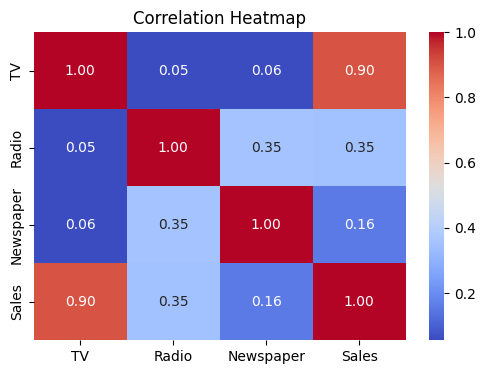

In [7]:
correlation_matrix = sales.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

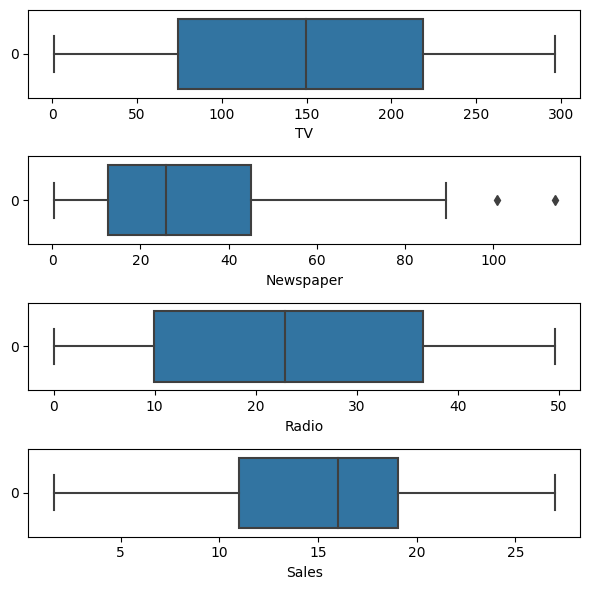

In [8]:
fig, axs = plt.subplots(4, figsize=(6,6))

plt1 = sns.boxplot(sales['TV'], ax=axs[0], orient='h')
plt2 = sns.boxplot(sales['Newspaper'], ax=axs[1], orient='h')
plt3 = sns.boxplot(sales['Radio'], ax=axs[2], orient='h')
plt4 = sns.boxplot(sales['Sales'], ax=axs[3], orient='h')

axs[0].set_xlabel('TV')
axs[1].set_xlabel('Newspaper')
axs[2].set_xlabel('Radio')
axs[3].set_xlabel('Sales')

plt.tight_layout()

plt.show()


### **4. Splitting for Training and Testing data**

In [9]:
X = sales.drop(["Sales"],axis=1)
Y = sales["Sales"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

### **5. Model Training and Evaluation**

In [10]:
model = LinearRegression()
model.fit(x_train,y_train)


model_train = model.predict(x_train)
model_train_acc = metrics.r2_score(model_train, y_train)
print("Training Accuracy of Linear Regression Model:- ",model_train_acc)

print("\n\n*************\n\n")

model_test = model.predict(x_test)
model_test_acc = metrics.r2_score(model_test, y_test)
print("Testing Accuracy of Linear Regression Model:- ",model_test_acc)

Training Accuracy of Linear Regression Model:-  0.8956211016375271


*************


Testing Accuracy of Linear Regression Model:-  0.8693026460890295


In [11]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)


ridge_model_train = ridge_model.predict(x_train)
ridge_model_train_acc = metrics.r2_score(ridge_model_train, y_train)
print("Training Accuracy of Ridge Regression Model:- ",ridge_model_train_acc)

print("\n\n*************\n\n")

ridge_model_test = ridge_model.predict(x_test)
ridge_model_test_acc = metrics.r2_score(ridge_model_test, y_test)
print("Testing Accuracy of Ridge Regression Model:- ",ridge_model_test_acc)

Training Accuracy of Ridge Regression Model:-  0.8956204348331339


*************


Testing Accuracy of Ridge Regression Model:-  0.8693006994895629


In [12]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train,y_train)


lasso_model_train = lasso_model.predict(x_train)
lasso_model_train_acc = metrics.r2_score(lasso_model_train, y_train)
print("Training Accuracy of Lasso Regression Model:- ",lasso_model_train_acc)

print("\n\n*************\n\n")

lasso_model_test = lasso_model.predict(x_test)
lasso_model_test_acc = metrics.r2_score(lasso_model_test, y_test)
print("Testing Accuracy of Lasso Regression Model:- ",lasso_model_test_acc)

Training Accuracy of Lasso Regression Model:-  0.8942150473983926


*************


Testing Accuracy of Lasso Regression Model:-  0.865878835489566


In [13]:
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)


regressor_train = regressor.predict(x_train)
regressor_train_acc = metrics.r2_score(regressor_train, y_train)
print("Training Accuracy of Random Forest Regressor Model:- ",regressor_train_acc)

print("\n\n*************\n\n")

regressor_test = regressor.predict(x_test)
regressor_test_acc = metrics.r2_score(regressor_test, y_test)
print("Testing Accuracy of Random Forest Regressor Model:- ",regressor_test_acc)

Training Accuracy of Random Forest Regressor Model:-  0.9922056946952009


*************


Testing Accuracy of Random Forest Regressor Model:-  0.9525512384203283


**We will be selecting Random Forest Regressor Model.**

### **6. Taking Input from User**

In [15]:
## Taking input from the user and predicting the output

TV = float(input("Enter Data for TV: "))
Radio = float(input("Enter Data for Radio: "))
Newspaper = float(input("Enter Data for Newspaper: "))


user_input = np.array([[TV,Radio,Newspaper]])

advertise = regressor.predict(user_input)

print("\n")

print("Your Sales:- ",advertise[0])

Enter Data for TV: 230.1
Enter Data for Radio: 37.8
Enter Data for Newspaper: 69.2


Your Sales:-  22.037999999999975
